In [1]:
# Get the data from the google sheet

# https://docs.google.com/spreadsheets/d/1co5Zp4C0rFfsj7ZzXaZW6C3ubOU4JSBv_BAXZbez7yE/edit#gid=415835194



data = {
    "Disease": {"Unattempted": 175, "Red": 5, "Amber": 3, "Green": 117, "Attempted": 125, "Total": 300},
    "Gene_protein": {"Unattempted": 230, "Red": 5, "Amber": 1, "Green": 64, "Attempted": 70, "Total": 300},
    "Organism": {"Unattempted": 260, "Red": 2, "Amber": 4, "Green": 34, "Attempted": 40, "Total": 300}
}

# Adding percentage calculations to the dictionary
for entity, values in data.items():
    data[entity]['% Unattempted'] = (values['Unattempted'] / values['Total']) * 100
    data[entity]['% Red'] = (values['Red'] / values['Attempted']) * 100
    data[entity]['% Amber'] = (values['Amber'] / values['Attempted']) * 100
    data[entity]['% Green'] = (values['Green'] / values['Attempted']) * 100

data



{'Disease': {'Unattempted': 175,
  'Red': 5,
  'Amber': 3,
  'Green': 117,
  'Attempted': 125,
  'Total': 300,
  '% Unattempted': 58.333333333333336,
  '% Red': 4.0,
  '% Amber': 2.4,
  '% Green': 93.60000000000001},
 'Gene_protein': {'Unattempted': 230,
  'Red': 5,
  'Amber': 1,
  'Green': 64,
  'Attempted': 70,
  'Total': 300,
  '% Unattempted': 76.66666666666667,
  '% Red': 7.142857142857142,
  '% Amber': 1.4285714285714286,
  '% Green': 91.42857142857143},
 'Organism': {'Unattempted': 260,
  'Red': 2,
  'Amber': 4,
  'Green': 34,
  'Attempted': 40,
  'Total': 300,
  '% Unattempted': 86.66666666666667,
  '% Red': 5.0,
  '% Amber': 10.0,
  '% Green': 85.0}}

In [2]:
# !pip install matplotlib

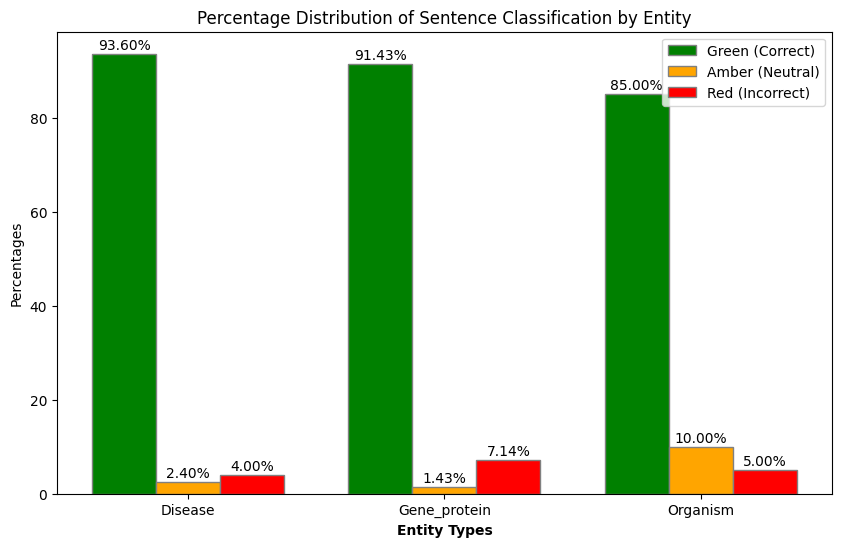

In [3]:
import matplotlib.pyplot as plt

# Extracting data for the bar chart
entities = ['Disease', 'Gene_protein', 'Organism']
percent_green = [data[entity]['% Green'] for entity in entities]
percent_amber = [data[entity]['% Amber'] for entity in entities]
percent_red = [data[entity]['% Red'] for entity in entities]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
barWidth = 0.25

# Set position of bar on X axis
r1 = [x for x in range(len(percent_green))]
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

# Make the plot
plt.bar(r1, percent_green, color='green', width=barWidth, edgecolor='grey', label='Green (Correct)')
plt.bar(r2, percent_amber, color='orange', width=barWidth, edgecolor='grey', label='Amber (Neutral)')
plt.bar(r3, percent_red, color='red', width=barWidth, edgecolor='grey', label='Red (Incorrect)')

# Adding percentages on top of bars
for i in range(len(entities)):
    plt.text(r1[i], percent_green[i] + 1, f'{percent_green[i]:.2f}%', ha='center')
    plt.text(r2[i], percent_amber[i] + 1, f'{percent_amber[i]:.2f}%', ha='center')
    plt.text(r3[i], percent_red[i] + 1, f'{percent_red[i]:.2f}%', ha='center')

# Adding Xticks
plt.xlabel('Entity Types', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(percent_green))], entities)

# Adding labels and title
plt.ylabel('Percentages')
plt.title('Percentage Distribution of Sentence Classification by Entity')

plt.legend()
plt.show()

